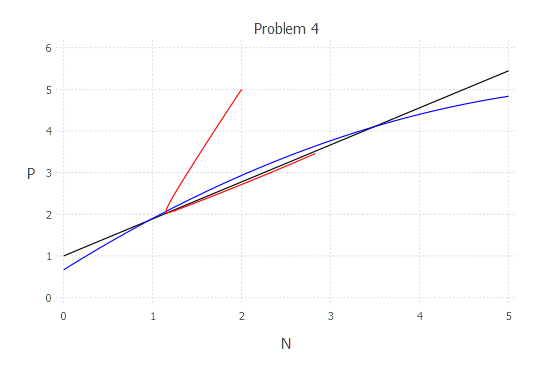

In [1]:
using ODE
using Gadfly

# Set of ode functions
function odefun(t, y)
    alpha = [.2, .4, .03]
    beta = .3
    gamma = .8
    rho = .9
    Pbar = 1.0
    
    ydot = similar(y)
    
    ydot[1] = alpha[1] + alpha[2] * y[1] - alpha[3] * y[1].^2 - beta * y[2]
    ydot[2] = gamma * y[1] - rho *(y[2] - Pbar)
    ydot
end

# Set of function nullcline function
function equifun(x)
    alpha = [.2, .4, .03]
    beta = .3
    gamma = .8
    rho = .9
    Pbar = 1.0
    
    y = similar(x)
    
    y[1] = (alpha[1] + alpha[2] * x[1] - alpha[3] * x[1].^2 )/beta
    y[2] = (gamma * x[2] + rho * Pbar)/rho
    
    return x,y
end

t = [0.0:.1:40.0;]
y0 = [2.0, 5.0]

t,y = ode45(odefun, y0, t)

N = [a[1] for a in y]
P = [a[2] for a in y]

x = [[0.0:.1:5.0;], [0.0:.1:5.0;]]

x, y = equifun(x)

plot(layer(x = N, y = P, Geom.path, Theme(default_color = colorant"red")),
     layer(x = x[1], y = y[1], Geom.line, Theme(default_color = colorant"blue")),
     layer(x = x[2], y = y[2], Geom.line, Theme(default_color = colorant"black")),
     Guide.xlabel("N"),
     Guide.ylabel("P"),
     Guide.title("Problem 4"))